In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('BAC.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())
#df.set_index('Date',inplace=True)
#earliest_date = df['Date'].min()
#df['Date'] = (df['Date'] - earliest_date).dt.days

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date_ordinal
0,2018-07-02,28.080000,28.280001,27.830000,28.280001,25.186296,52534300,736877
1,2018-07-03,28.330000,28.430000,27.740000,27.780001,24.740997,40599000,736878
2,2018-07-05,27.950001,28.080000,27.809999,27.920000,24.865677,44506800,736880
3,2018-07-06,27.809999,28.150000,27.629999,28.030001,24.963646,39424900,736881
4,2018-07-09,28.230000,29.090000,28.219999,29.049999,25.872059,61758900,736884


In [3]:
df=df.dropna()

In [4]:
df=df[['Date_ordinal','Close']]

In [5]:
df.head()

,Date_ordinal,Close
0,736877,28.280001
1,736878,27.780001
2,736880,27.920000
3,736881,28.030001
4,736884,29.049999


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Date_ordinal_scaled'] = scaler.fit_transform(df[['Date_ordinal']])
df['Close_Scaled'] = scaler.fit_transform(df[['Close']])


time_steps=60
samples = len(df) - time_steps

X, y = [], []
for i in range(samples):
    X.append(df['Date_ordinal_scaled'].iloc[i:i+time_steps].values)
    y.append(df['Close_Scaled'].iloc[i+time_steps])

X = np.array(X).reshape(samples, time_steps, 1)
y = np.array(y)

In [7]:
#features=df[['Date_ordinal']]#index.values.reshape(-1, 1).astype(np.float64)

#target=df['Close']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [9]:
len(X_train)

958

In [10]:
len(X_test)

240

In [11]:
import numpy as np

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X.shape[1]))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
15/15 [==============================] - 2s 21ms/step - loss: 0.0702
Epoch 2/50
15/15 [==============================] - 0s 22ms/step - loss: 0.0464
Epoch 3/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0395
Epoch 4/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0378
Epoch 5/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0366
Epoch 6/50
15/15 [==============================] - 0s 19ms/step - loss: 0.0362
Epoch 7/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0360
Epoch 8/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0360
Epoch 9/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0362
Epoch 10/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0357
Epoch 11/50
15/15 [==============================] - 0s 20ms/step - loss: 0.0356
Epoch 12/50
15/15 [==============================] - 0s 21ms/step - loss: 0.0356
Epoch 13/50
15/15 [==================

In [14]:
predictions = model.predict(X_test)

8/8 [==============================] - 0s 6ms/step


In [15]:
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale=scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
predictions_original_scale = predictions_original_scale.reshape(-1)
y_test_original_scale=y_test_original_scale.reshape(-1)

Mean Absolute Error: 1.9618028198766073


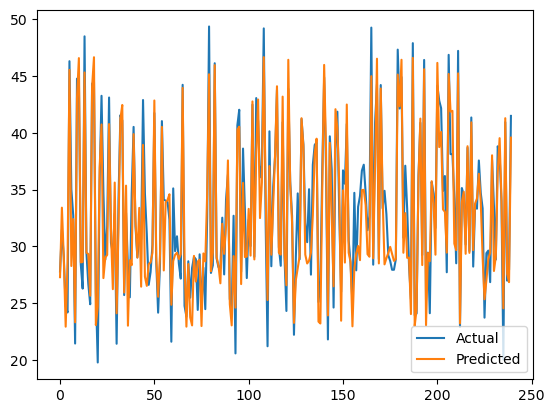

In [17]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

error = mean_absolute_error(y_test_original_scale, predictions_original_scale)
print('Mean Absolute Error:', error)

plt.plot(y_test_original_scale, label='Actual')
plt.plot(predictions_original_scale, label='Predicted')
plt.legend()
plt.show()

In [18]:
from sklearn import metrics

In [19]:
mse=metrics.mean_squared_error(y_test_original_scale,predictions_original_scale)
print('MSE:',mse)

MSE: 6.7405739646885


In [20]:
r2=metrics.r2_score(y_test_original_scale,predictions_original_scale)
print('R2 Score:',r2)

R2 Score: 0.8554850894425823
